### TASK 3: CUSTOMER SEGMENTATION/CLUSTERING 

Importing necessary Libearies and loading dataset, renaming columns for simplicity

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')

transactions.rename(columns={'Price_x': 'TransactionPrice', 'Price_y': 'ProductPrice'}, inplace=True)

Grouping based on customer features

In [3]:
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductPrice': 'mean'
}).reset_index()

In [4]:
customer_features

,CustomerID,TotalValue,Quantity,ProductPrice
0,C0001,3354.52,12,278.334000
1,C0002,1862.74,10,208.920000
2,C0003,2725.38,14,195.707500
3,C0004,5354.88,23,240.636250
4,C0005,2034.24,7,291.603333
...,...,...,...,...
194,C0196,4982.88,12,416.992500
195,C0197,1928.65,9,227.056667
196,C0198,931.83,3,239.705000
197,C0199,1979.28,9,250.610000


Normalizing values

In [5]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'ProductPrice']])


In [6]:
customer_features

,CustomerID,TotalValue,Quantity,ProductPrice
0,C0001,3354.52,12,278.334000
1,C0002,1862.74,10,208.920000
2,C0003,2725.38,14,195.707500
3,C0004,5354.88,23,240.636250
4,C0005,2034.24,7,291.603333
...,...,...,...,...
194,C0196,4982.88,12,416.992500
195,C0197,1928.65,9,227.056667
196,C0198,931.83,3,239.705000
197,C0199,1979.28,9,250.610000


Clustering

In [7]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(normalized_features)
customer_features['Cluster'] = clusters


C:\Users\riaka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Calculating DB Index

In [8]:
db_index = davies_bouldin_score(normalized_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.874354292939002


Plotting Clusters

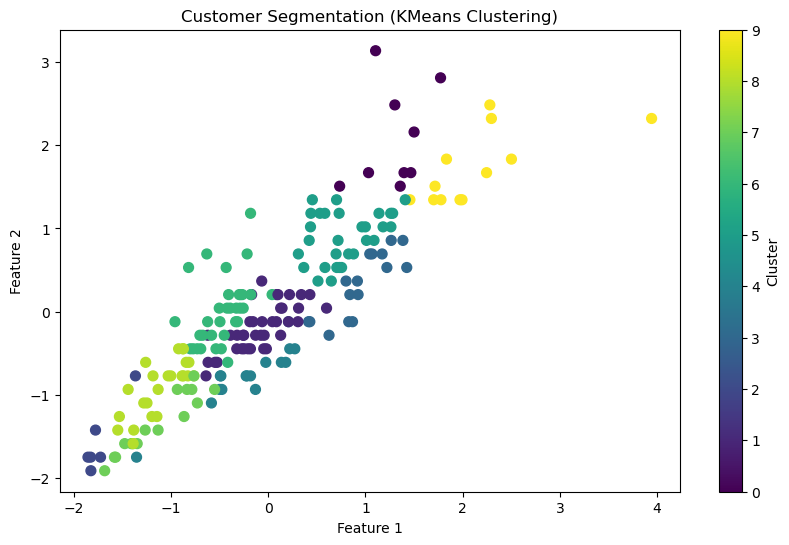

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Segmentation (KMeans Clustering)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()